# Wichtig: 

in der Vorlesung besprochen!  

* Diese Aufgabe wird als Team Projekt bewertet. (max. 3 Teilnehmer) 
* Die hier erreichten Punkte gehen zu 20% in Klausur-Bewertung ein.

## Teilnehmer

* Geben Sie hier im Dokument die Namen der Teilnehmer an! 

Teilnehmer: 
* Sebastian Trauth
* Henrik Kaltenbach
* Marlene Hill

### Abgabe

* Die Abgabe erfolgt über Moodle

* Abzugeben ist ein jupyter Notebook mit
    * Text, der beschreibt was und wieso sie die einzelnen Analyse-Schritte durchführen 
    * Pythoncode, der die einzelnen Schritte durchführt
    * eine Zusammenfassung am Ende

* Sie können neue Zellen mit Hilfe der Jupyter-Icons hinzufügen
    * Sie können zwischen Markdown oder Code wählen 

* Export des Jupyter Notebooks
    * save as --> ipynb

* Das Jupyter Notebook zur Deadline in Moodle hochladen! 
    * der Name des JupyterNotebooks enthält auch die Namen der Teilnehmer

### Kriterien

* Sind die einzelnen Schritte gut dokumentiert und begründet? 

* Sind die bekannten in der Vorlesung vorgestellten Verfahren sinnvoll eingesetzt worden? 
    * Wurde begründet wieso ein Verfahren nicht weiter verfolgt wurde? 

* Wurde eine gute Klassifizierung erreicht? 

# Aufgabe zur Klassifizierung

Im Verzeichnis data-classification finden Sie Daten aus einem MicroCensus
* die Datei adult.data enthält Datenobjekte (zum Trainieren)
* die Datei adult.test enthält Datenobjekte (zum Testen)
* die Datei adult.names enthält Beschreibungen zu den Daten

## Aufgaben 

Entwickeln Sie ein Klassifizierungsmodell, dass so genau wie möglich vorhersagt, ob eine Person ein Einkommen von mehr als 50000 Dollar pro Jahr hat!
* Verwenden Sie was sie bisher gelernt haben! 
* Seien Sie kritisch!

## Einlesen der Daten in eine Objekt-Liste

Es werden die Trainings- und die Testdaten in Objektlisten eingelesen. Ein klar definierter Seperator sorgt für das korrekte Parsen. Die erste Zeile in `adult.test` enthält keinen Daten, sie kann also direkt entfernt werden.
Die Trainingsdaten verfügen über 32561 Einträge, die Testdaten über 16281. Beide Datensätze bestehen aus 15 Merkmalen.

In [1]:
import pandas as pd

labels = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex' , 'capital-gain' , 'capital-loss', 'hours-per-week', 'native-country', '<50k']

df_train: pd.DataFrame = pd.read_csv('./data-classification/adult.data', sep=', ', engine='python', header=None, names=labels)
df_test: pd.DataFrame = pd.read_csv('./data-classification/adult.test', sep=', ', engine='python', header=None, names=labels)
df_test.drop(index=0, inplace=True)

print('Train data: ' + str(df_train.shape))
print('Test data: ' + str(df_test.shape))

Train data: (32561, 15)
Test data: (16281, 15)


In [2]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<50k
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Vorbereitung der Daten

Die Daten sind nicht direkt so nutzbar.
Sie enthalten einige Fehler die entfernt werden müssen.
Außerdem können die Merkmale in dem Format in dem sie vorliegen nicht verarbeitet werden und müssen verändert werden.
Diese Schritte werden hier beschrieben und umgesetzt.
Diese Schritte müssen auf die Test- wie auch auf die Trainingsdaten angewendet werden.

### 1. Fehlerhafte Daten

In den Test- und Trainingsdaten sind Datensätze gefunden worden, die "?" und "NaN" beinhalten.
Diese Datensätze werden ausgeschlossen und können somit entfernt werden.
Das ist durch die große Zahl an vorhandenen Daten akzeptabel.
Durch nominale Werte wie z.B. die Länderdaten ist als Alternative die Mittelwertbildung nicht sinnvoll.

### 2. Unterschiedlichen Datentypen

Die Spalte "Age" beinhaltet teilweise Strings und teilweise Integer.
Um mit dieser Spalte arbeiten zu können, müssen alle Werte in dieser Spalte in Integer umgewandelt werden.
Außerdem gibt es einen Unterschied des Datentyps in den Spalten "capital-gain",
"capital-loss" und "hours-per-week" in den Testdaten im Gegensatz zu den Trainingsdaten.
In den Testdaten liegen diese Spalten als Double vor. In den Trainingsdaten als Integer.

In [4]:
# Datentypen der Spalten
print('Train data\n' + str(df_train.dtypes))
print('\nTest data\n' + str(df_test.dtypes))

Train data
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
<50k              object
dtype: object

Test data
age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
<50k               object
dtype: object


### 3. Formatierung

Bei der Betrachtung der Daten fällt auf, dass die Formatierung der letzten Spalte "<50k" nicht konsistent ist.
Nach ">50K" oder "<=50K" ist ein zusätzlicher "." vorhanden.
Dieser lässt sich durch eine Ersetzung beseitigen (replace).

Mögliche Whitespaces entfernen am Anfang und am Ende entfernen (strip).


### 4. Ungenaue Daten

Die Spalte "fnlwgt" wird nicht einheitlich bestimmt und kann aufgrund ihrer Inkonsistenz nicht als Grundlage dienen. Dementsprechend wird sie entfernt.

### 5. Duplikate

Der Datensatz enthält redundante Einträge.
Z.B. sind die Daten in der Spalte "Education" bereits als Dictionary in der Spalte "Education-Number" hinterlegt.
Das macht die Spalte "Education" überflüssig und sie kann entfernt werden.
Es wird natürlich auch nach doppelten Zeilen in den Daten gesucht, die entfernt werden müssen.
Bei Duplikaten kann die Gewichtung verändert werden, die das Modell zu spezifisch trainieren.


In [5]:
liste = df_train.duplicated()
doppelt = 0
for b in liste:
    if b:
        doppelt += 1
print('Duplikate: ' + str(doppelt))

Duplikate: 24


### 6. Merkmale auf numerische Werte mappen

Die Algorithmen, die zum Trainieren eines MachineLearning-Modells verwendet werden können nur mit Zahlen arbeiten.
Zum Beispiel "Education-Number", "Age", "capital-gain", "capital-loss" und "hours-per-week" sind bereits ordinale Werte (mit innerer Ordnung).
Die restlichen Daten wie zum Beispiel "workclass" oder "occupation"	sind nominale.

Für die Spalte "Sex" lassen sich die nominalen Werte sogar in ordinale verändern.
Dabei wird "female" durch 1 und "male" durch 0 ersetzt.

Die letzte Spalte "<50k" wird auch für 0 und 1 dargestellt.
"<=50K" wird durch 0 und ">50K" durch 1 ersetzt.

Ein OneHotEncoder wird benutzt, um die restlichen nominalen Werte numerisch darzustellen.
Dafür werden die Werte in Matrizen verwandelt. So sind alle Werte nur noch mit 1 und 0 darstellbar.
Der Encoder erstellt eine Liste aller möglichen Einträge und erzeugt so viele neue Spalten, wie die Liste Einträge hat.
Für jede ursprüngliche Spalte, die den Namen der Spalte als Eintrag hat, wird für jede Spalte in der Zeile eine 1 eingetragen.

Die Vorbereitung wird in der folgenden Funktion dargestellt:

In [6]:
def prepareData(dataFrame: pd.DataFrame):
    #1 Ungültige Einträge entfernen
    dataFrame.replace(to_replace='?', value=pd.NaT, inplace=True)
    dataFrame.replace(to_replace='None', value=pd.NaT, inplace=True)
    dataFrame.dropna(inplace=True)

    #2 Unterschiedliche Datentypen
    dataFrame['age'] = pd.to_numeric(dataFrame['age'], errors='coerce')
    
    #3 Formatierung und Satzzeichen
    dataFrame.replace(to_replace='<=50K.', value='<=50K', inplace=True)
    dataFrame.replace(to_replace='>50K.', value='>50K', inplace=True)
    
    #5 Ungenaue Daten entfernen
    if 'fnlwgt' in dataFrame.columns:
        dataFrame.drop(labels=['fnlwgt'], axis=1, inplace=True)

    #4 Duplikate und Redundanzen
    if 'education' in dataFrame.columns:
        dataFrame.drop(labels=['education'], axis=1, inplace=True)
    dataFrame.drop_duplicates(inplace=True)

    #6 String mapping
    dataFrame.replace(to_replace='<=50K', value=0, inplace=True)
    dataFrame.replace(to_replace='>50K', value=1, inplace=True)
    dataFrame.replace(to_replace='Male', value=0, inplace=True)
    dataFrame.replace(to_replace='Female', value=1, inplace=True)

    return pd.get_dummies(dataFrame)

In [7]:
df_train_prepared = prepareData(df_train)
df_test_prepared = prepareData(df_test)
print('Train data: ' + str(df_train_prepared.shape))
print('Test data: ' + str(df_test_prepared.shape))
df_train_prepared.head()

Train data: (26904, 87)
Test data: (14130, 86)


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,<50k,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Insgesamt werden 2422 Einträge in den Trainingsdaten und 1226 Einträge in den Testdaten durch die Datenvorbereitung entfernt. Da die Datenmenge groß genug ist, ist das vertretbar.

Die Spaltenanzahl für Trainings- und Testdaten ist unterschiedlich, es fehlt eine Spalte bei den Testdaten. Dies ist damit zu begründen, dass die Testdaten eine Landesauswahl (Niederlande) nicht haben, welche allerdings für die Trainingsdaten gegeben war. Um dies auszugleichen, werden leere Spalten hinzugefügt und mit dem Titel versehen, welchen die zusätzliche Spalte trägt.

In [8]:
diffColumns = [x for x in df_train_prepared.columns if x not in df_test_prepared.columns]

#hinzufuegen der Anzahl der Werte
for category in diffColumns:    
    df_test_prepared[category] = len(df_test_prepared) * [0]
    
df_test_prepared = df_test_prepared[df_train_prepared.columns]

## Aufteilung der Daten
Um mit den Daten lernen zu können, müssen diese in Ausgangsdaten und Zielwerte unterteilt werden.
Die Ausgangswerte (x_train/x_test) beinhalten die Merkmale ohne die Einteilung der Spalte des Gehalts "<50k".
Die Zielwerte (y_train/y_test) beinhalten die Werte der Spalte "<50k".

In [9]:
#index der Spalte von <50k als Liste
indexTest50K = df_test_prepared.columns.tolist().index('<50k')
indexTrain50K = df_train_prepared.columns.tolist().index('<50k')

#Aufteilen der Spalten der Testdaten
df_test2_prepared = df_test_prepared.copy()
df_test2_prepared.drop(labels=['<50k'], axis=1, inplace=True)

#Aufteilen der Spalten der Trainingsdaten
df_train2_prepared = df_train_prepared.copy()
df_train2_prepared.drop(labels=['<50k'], axis=1, inplace=True)

#Aufteilen der Spalten der Testdaten
df_test2_prepared = df_test_prepared.copy()
df_test2_prepared.drop(labels=['<50k'], axis=1, inplace=True)

#Erstellen der Datensätze
x_test, y_test = df_test2_prepared.values, df_test_prepared.iloc[:, indexTest50K].values
x_train, y_train = df_train2_prepared.values, df_train_prepared.iloc[:, indexTrain50K].values

## Standardisierung

Um die Ergebnisse zu verbessern werden die Daten anschließend noch standardisiert.
Dazu wird eine Normalverteilung der Werte genutzt.
Dafür wird die Bibliothek "StandardScaler" von sklearn benutzt.
Nach diesem Schritt sind die Daten vorbereitet.

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

## Merkmalauswahl

Aus 86 Merkmalen eine binäre Klassifizierung zu erstellen, würde zu einer Überanpassung des Modells führen. Es soll daher im Folgenden überprüft werden, welchen Einfluss die einzelnen Merkamle auf das Gesamtergebnis haben. Daraus kann geschlussfolgert werden, welche Merkmale unbedeutend und somit entfernbar sind.

Dabei soll zuerst die Relevanz der einzelnen Merkmale mittels des RandomForest ermittelt werden, da dieser eine Gesamtübersicht für 86 Merkmale erstellen kann.

### 1. RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

Die hierbei erhaltenen Daten werden nun als Graphik dargestellt. Dabei ist ersichtlich, dass nach den ersten 15 Merkmalen der Balken nicht mehr dargestellt wird. Die ersten 15 Werte werden als Liste ausgegeben. Aus dieser wird anschließend eine qualifizierte Auswahl getroffen.

In [12]:
indices = np.argsort(importances)[::-1]

feat_labels = df_test2_prepared.columns[:]

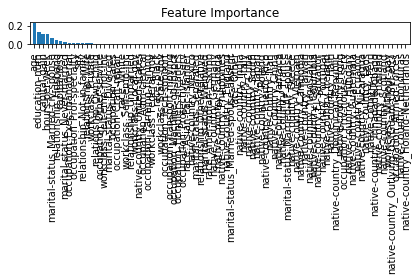

In [13]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [14]:
for f in range(15):
    print('%2d. %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1. age                            0.223696
 2. education-num                  0.127925
 3. capital-gain                   0.116186
 4. hours-per-week                 0.115649
 5. marital-status_Married-civ-spouse 0.069373
 6. relationship_Husband           0.044778
 7. capital-loss                   0.039865
 8. marital-status_Never-married   0.022677
 9. occupation_Exec-managerial     0.018327
10. occupation_Prof-specialty      0.015776
11. sex                            0.015200
12. relationship_Not-in-family     0.012009
13. relationship_Wife              0.010687
14. workclass_Private              0.010073
15. relationship_Own-child         0.009231


Dabei fiel auf, dass innerhalb dieses Bereichs der Einfluss der Merkmale auf unter 1% fällt. Aus diesem Grund wurde entschieden, eine Grenze bei 1% zu setzen. Die 14 Elemente, deren Einfluss darüber liegt, werden nun in x_train_important gespeichert. Dies wird mittels der Methode SelectFromModel() durchgeführt. 

In [15]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.010, prefit=True)

x_train_important = sfm.transform(x_train)
x_train_istd = stdsc.fit_transform(x_train_important)

idx_IN_columns = [indices[x] for x in range(x_train_important.shape[1])]
x_test_important = x_test[:, idx_IN_columns]
x_test_istd = stdsc.transform(x_test_important)

### 2. SBS

Um zu zeigen, dass sich aus diesen 14 Elementen eine genaue Vorhersage treffen lässt, soll der SBS-Algorithmus durchgeführt werden. Dessen Resultat wird nach dem folgenden Codeabschnitt als Graphik dargestellt.

Anhand dieser Graphik wird zudem deutlich, welche der verbleibenden 14 Werte nach Aussage des SBS-Algorithmus ausschlaggebend für das Gesamtergebnis sind.

In [16]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = self.test_size, random_state = self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, x_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train, y_train, x_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, x):
        return x[:, self.indices_]

    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features = 1)
sbs.fit(x_train_istd, y_train)

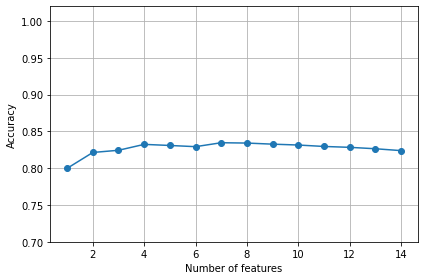

In [18]:
# Plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

Anhand dieser Graphik zeigt sich, dass SBS/KNN mit 4 Merkmalen die besten Ergebnisse erzielt. Dies wurde anhand der Trainings- und Testdaten überprüft. Hierfür wird die Trainigsgenauigkeit mit allen (86), den 14 zuvor gewählten und den vier scheinbar besten Merkmalen berechnet. 
Ebenso wird für alle diese Fälle die Testgenauigkeit berechnet.

In [19]:
elements = list(sbs.subsets_[10])

# Genauigkeit für alle Merkmale (86)
knn.fit(x_train_std, y_train)
print('Trainingsgenauigkeit für alle Merkmale: ', knn.score(x_train_std, y_train))
print('Testgenauigkeit für alle Merkmale: ', knn.score(x_test_std, y_test))

#Genauigkeit für 15 Merkmale
knn.fit(x_train_istd, y_train)
print('Trainingsgenauigkeit für 14 Merkmale: ', knn.score(x_train_istd, y_train))
print('Testgenauigkeit für 14 Merkmale: ', knn.score(x_test_istd, y_test))

#Genauigkeit für 4 Merkmale
print('Vier auswählgewählte Merkmale: ', df_test2_prepared.columns[1:][elements])
knn.fit(x_train_istd[:, elements], y_train)
print('Trainingsgenauigkeit für 4 Merkmale: ', knn.score(x_train_istd[:, elements], y_train))
print('Testgenauigkeit für 4 Merkmale: ', knn.score(x_test_istd[:, elements], y_test))

Trainingsgenauigkeit für alle Merkmale:  0.8697963128159382
Testgenauigkeit für alle Merkmale:  0.8178343949044586
Trainingsgenauigkeit für 14 Merkmale:  0.8701680047576569
Testgenauigkeit für 14 Merkmale:  0.583793347487615
Vier auswählgewählte Merkmale:  Index(['sex', 'capital-loss', 'hours-per-week', 'workclass_Without-pay'], dtype='object')
Trainingsgenauigkeit für 4 Merkmale:  0.8348572702943801
Testgenauigkeit für 4 Merkmale:  0.6462137296532201


Anhand dieser Werte zeigt sich, dass sich die Trainingsgenauigkeit von allen zu 14 Merkmalen kaum verschlechtert. Dabei tritt eine deutliche Verschlechterung der Testgenauigkeit ein. Von 14 zu 4 Merkmalen sinkt die Trainingsgenauigkeit, dafür wird die Testgenauigkeit besser. Da das Modell anhand von Trainingsdaten erstellt werden soll, wird vorerst bei 14 Merkmalen verblieben.

## Daten komprimieren

Um die Datenmenge noch weiter zu verringern, sollen nun Datenkomprimierungalgorithmen angewendet werden. Dabei sind drei Algorithmen bekannt: PCA, LDA und Kernel PCA.

### 1. PCA

PCA dient eigentlich zum unüberwachten Lernen. Dabei wird der Merkmalsraum linear transformiert und somit verändert. Merkmale werden nicht entfernt, sondern in Abhängigkeiten zueinander dargestellt. Hierfür wird zuerst eine Darstellung mit 2 verbleibenden Komponenten berechnet und visualisiert. 

In [20]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha = 0.6, 
                    c = colors[idx],
                    edgecolor = 'black',
                    marker = markers[idx], 
                    label = cl)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

Das hierbei erstellte Ergebnis wird nun durch zwei Grafiken dargestellt. Die Erste stellt die Trainingsdaten und die Zweite die Testdaten dar.

C:\Users\SEBAST~1\AppData\Local\Temp/ipykernel_5668/3450516823.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


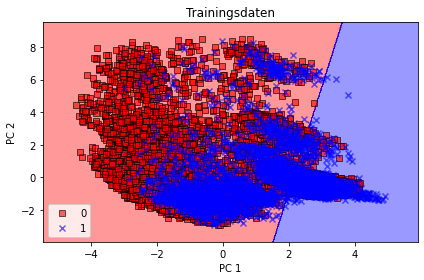

C:\Users\SEBAST~1\AppData\Local\Temp/ipykernel_5668/3450516823.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0],


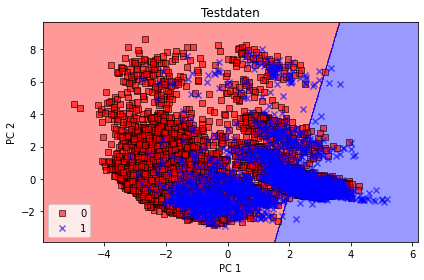

In [21]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.title("Trainingsdaten")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

X_test_pca = pca.transform(x_test_std)

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.title("Testdaten")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Anhand der Verteilungen in den Grafiken ist schon ersichtlich, dass eine Trennung der Daten problematisch werden könnte. Um dies zu bestätigen, wird die Testgenauigkeiten für alle möglichen Aufteilungen (2 bis 14) berechnet werden. Dies wird im nächsten Codeabschnitt berechnet.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

for i in range(2,x_train_important.shape[1]):
    pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=i),
                        LogisticRegression(random_state=1, solver='lbfgs'))
    pipe_lr.fit(x_train_important, y_train)
    print('PCA Testgenauigkeit: %.3f, Komponenten: ' % pipe_lr.score(x_test_important, y_test), i)

PCA Testgenauigkeit: 0.682, Komponenten:  2
PCA Testgenauigkeit: 0.664, Komponenten:  3
PCA Testgenauigkeit: 0.699, Komponenten:  4
PCA Testgenauigkeit: 0.700, Komponenten:  5
PCA Testgenauigkeit: 0.700, Komponenten:  6
PCA Testgenauigkeit: 0.745, Komponenten:  7
PCA Testgenauigkeit: 0.729, Komponenten:  8
PCA Testgenauigkeit: 0.734, Komponenten:  9
PCA Testgenauigkeit: 0.685, Komponenten:  10
PCA Testgenauigkeit: 0.707, Komponenten:  11
PCA Testgenauigkeit: 0.707, Komponenten:  12
PCA Testgenauigkeit: 0.710, Komponenten:  13


Hierbei bestätigt sich die zuvor getroffene Vermutung. Im Vergleich zum vorherigen Schritt gibt es einen starken Verlust an Genauigkeit, weshalb PCA nicht für die Komprimierung der Daten verwendet wird.

### 2. LDA

LDA dient zum überwachten Lernen. Dabei wird ein Merkmalsunterraum gesucht, welcher die Trennbarkeit der Klassen optimiert.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train_istd,y_train)

lr = LogisticRegression()
lr = lr.fit(x_train_lda, y_train)
print('LDA Testgenauigkeit: %.3f, Komponenten: 1' % lr.score(x_train_lda, y_train))

LDA Testgenauigkeit: 0.824, Komponenten: 1


Auch hier zeigt sich wieder, dass die Trainingsgenauigkeit geringer wird. Somit bringt die Anwendung von LDA auch keinen Vorteil für diesen Anwendungsfall.

### 3. Kernel-PCA

Das dritte Kompressionsverfahren ist Kernel-PCA. Dieses wird verwendet, wenn die Daten nicht linear trennbar sind. Wie sich durch PCA gezeigt hat, ist dies bei dem gegeben Datensatz der Fall. Allerdings ist die hierfür notwendige Berechnung sehr aufwendig. Deshalb wird zuerst nur mit wenigen Daten getestet, um zu überprüfen, ob eine Verbesserung möglich wäre.

In [24]:
from sklearn.decomposition import KernelPCA

x_train_kpca = x_train_istd[:5000]
y_train_kpca = y_train[:5000]

pipe_lr = make_pipeline(StandardScaler(),KernelPCA(kernel='rbf', gamma=15, n_components=8, n_jobs=-1), LogisticRegression(random_state=1))
pipe_lr.fit(x_train_kpca, y_train_kpca)
print('Kernel-PCA Testgenauigkeit: %.3f' % pipe_lr.score(x_test_istd, y_test))

Kernel-PCA Testgenauigkeit: 0.752


Dabei zeigt sich, dass Kernel-PCA keinen wirklichen Fortschritt bringt. Deshalb wird auch dies nicht weiter verfolgt.


### Ergebnis

Es wird kein Datenkomprimierungsalgorithmus verwendet, da diese bei dem gegebenen Datensatz keinen Vorteil bieten. Somit wird mit den 14 zuvor gewählten Merkmalen weiterhin gearbeitet.

## Lernmethoden

Im Folgenden werden die verschiedenen Lernverfahren dargestellt, um zu überprüfen, welches das beste Ergebnis liefert. Dafür werden zuerst alle Verfahren erstellt und anschließend die Genauigkeit der Trainings- als auch der Testdaten dargestellt. Dabei wurden die verschiedenen Argumente so gewählt, dass ein mögliches Überanpassen verhindert wird. So wird etwa der RandomForest mit einer maximalen Tiefe von 4 ausgeführt.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Erstellen der Pipelines
pipe_lr = make_pipeline(LogisticRegression(C = 100.0, random_state = 1))
pipe_pe = make_pipeline(Perceptron(max_iter = 40, eta0 =0.1, random_state = 2))
pipe_svcL = make_pipeline(SVC(kernel='linear', C = 1.0, random_state = 1))
pipe_svcR = make_pipeline(SVC(kernel='rbf', random_state = 1, gamma = 0.10, C = 10.0))
pipe_dtc = make_pipeline(DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1))
pipe_rfc = make_pipeline(RandomForestClassifier(criterion = 'gini', max_depth = 4, n_estimators = 12, random_state = 1, n_jobs=-1))
pipe_knn = make_pipeline(KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski'))

Zudem wird eine Funktion printPrecision erstellt, welche seperat ausgibt, zu welchem Anteil das Gehalt der Personen korrekt klassifiziert wurde.

In [26]:
def printPrecision(pipe, dataType, x, y):
        pred_x = pipe.predict(x)
        print(dataType + ": Correctly detected <=50k: %.3f" % (np.sum(pred_x[y == 1] == 1) / np.sum(y == 1)))
        print(dataType + ": Correctly detected  >50k: %.3f" % (np.sum(pred_x[y == 0] == 0) / np.sum(y == 0)))


Nun wird eine Funktion erstellt, welche die Trainings- und Testgenauigkeit für die verschiedenen Algorithmen berechnet. In dieser wird printPrecision aufgerufen.

In [27]:
def testMlAlgo(pipe, name, x_train, y_train, x_test, y_test):
    print(name)
    pipe.fit(x_train, y_train)
    print('Trainingsgenauigkeit: %.3f' % pipe.score(x_train, y_train))
    print('Testgenauigkeit: %.3f' % pipe.score(x_test, y_test))
    printPrecision(pipe, "Training", x_train, y_train)
    printPrecision(pipe, "Test", x_test, y_test)
    print()

testMlAlgo(pipe_lr, 'LogisticRegression', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_pe, 'Perception', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_svcL, 'SVC-linear', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_svcR, 'SVC-rbf', x_train_istd, y_train, x_test_istd, y_test) 
testMlAlgo(pipe_dtc, 'DecisionTreeClassifier', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_rfc, 'RandomForestClassifier', x_train_istd, y_train, x_test_istd, y_test)  
testMlAlgo(pipe_knn, 'KNN', x_train_istd, y_train, x_test_istd, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.838
Testgenauigkeit: 0.702
Training: Correctly detected <=50k: 0.581
Training: Correctly detected  >50k: 0.926
Test: Correctly detected <=50k: 0.167
Test: Correctly detected  >50k: 0.879

Perception
Trainingsgenauigkeit: 0.769
Testgenauigkeit: 0.421
Training: Correctly detected <=50k: 0.657
Training: Correctly detected  >50k: 0.807
Test: Correctly detected <=50k: 0.190
Test: Correctly detected  >50k: 0.497

SVC-linear
Trainingsgenauigkeit: 0.837
Testgenauigkeit: 0.668
Training: Correctly detected <=50k: 0.553
Training: Correctly detected  >50k: 0.934
Test: Correctly detected <=50k: 0.211
Test: Correctly detected  >50k: 0.820

SVC-rbf
Trainingsgenauigkeit: 0.855
Testgenauigkeit: 0.607
Training: Correctly detected <=50k: 0.590
Training: Correctly detected  >50k: 0.946
Test: Correctly detected <=50k: 0.475
Test: Correctly detected  >50k: 0.650

DecisionTreeClassifier
Trainingsgenauigkeit: 0.835
Testgenauigkeit: 0.699
Training: Correctly detected 

### Auswertung

Bei den durchlaufenen Testfällen zeigt sich, dass der RandomForestClassifier das beste Ergebnis bei den Trainingsdaten liefert. Dabei liegt die Trainingsgenauigkeit bei 92,9% und die Testgenauigkeit bei 79,1%. Die beste Testgenauigkeit liefert der DecisionTreeClassifier mit 80,3% , hier liegt die Trainingsgenauigkeit bei 84%.

Der Unterschied der Werte lässt darauf vermuten, dass eine Überanpassung vorliegen könnte. Deshalb wird der gleiche Test nochmal mit weniger Merkmalen durchgeführt. Hierfür werden die 4 Merkmale verwendet, welche die SBS-Analyse als am wichtigsten betrachtet hat.

Die Zusatzinformationen zeigen, dass das Problem meist in der Erkennung der >50K-Fälle liegt.

In [28]:
k3 = list(sbs.subsets_[10])
x_train_short = x_train_istd[:, k3]
x_test_short = x_test_istd[:, k3]

testMlAlgo(pipe_lr, 'LogisticRegression', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_pe, 'Perception', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_svcL, 'SVC-linear', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_svcR, 'SVC-rbf', x_train_short, y_train, x_test_short, y_test) 
testMlAlgo(pipe_dtc, 'DecisionTreeClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_rfc, 'RandomForestClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe_knn, 'KNN', x_train_short, y_train, x_test_short, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.826
Testgenauigkeit: 0.700
Training: Correctly detected <=50k: 0.543
Training: Correctly detected  >50k: 0.923
Test: Correctly detected <=50k: 0.077
Test: Correctly detected  >50k: 0.906

Perception
Trainingsgenauigkeit: 0.790
Testgenauigkeit: 0.652
Training: Correctly detected <=50k: 0.592
Training: Correctly detected  >50k: 0.858
Test: Correctly detected <=50k: 0.166
Test: Correctly detected  >50k: 0.812

SVC-linear
Trainingsgenauigkeit: 0.827
Testgenauigkeit: 0.709
Training: Correctly detected <=50k: 0.512
Training: Correctly detected  >50k: 0.936
Test: Correctly detected <=50k: 0.074
Test: Correctly detected  >50k: 0.919

SVC-rbf
Trainingsgenauigkeit: 0.833
Testgenauigkeit: 0.709
Training: Correctly detected <=50k: 0.505
Training: Correctly detected  >50k: 0.946
Test: Correctly detected <=50k: 0.074
Test: Correctly detected  >50k: 0.919

DecisionTreeClassifier
Trainingsgenauigkeit: 0.832
Testgenauigkeit: 0.709
Training: Correctly detected 

Hierbei zeigt sich, dass sich die Trainingsgenauigkeit nicht wirklich verändert bzw. leicht verschlechtert hat. Beim RandomForestAlgorithmus ist sie schlechter geworden. Die Testgenauigkeit steigt im Durchschnitt an, der Wert von 80% wird knapp erreicht. Zu bemerken ist ebenfalls, dass sich der Prozentwert der korrekt erkannten >50K-Fälle teils verdreifacht hat. Dies stellt einen wichtigen Fortschritt zur Verringerung der Überanpassung dar. Die <=50K-Fälle werden nach wie vor sehr zuverlässig erkannt.

Ein anderes Problem stellt hierbei die Verteilung der Trainingsdaten dar. Es liegen deutlich mehr Trainingsdaten für <=50K vor als für >50K. Dies wird auch in der folgenden Grafik veranschaulicht. Dies ließe sich möglicherweise so verbessern, dass die Algorithmen eine Straffunktion anwenden, welche für die seltener vorkommenden Werte stärker agiert. Dies lässt sich mit class_weight='balanced' als Parameter erreichen. 

In [29]:
print("Trainingsdaten mit >50K: " + str(np.sum(y_train==0)))
print("Trainingsdaten mit <=50K: " + str(np.sum(y_train==1)))

print("Testdaten mit >50K: " + str(np.sum(y_test==0)))
print("Testdaten mit <=50K: " + str(np.sum(y_test==1)))

Trainingsdaten mit >50K: 20024
Trainingsdaten mit <=50K: 6880
Testdaten mit >50K: 10620
Testdaten mit <=50K: 3510


In [30]:
pipe2_lr = make_pipeline(LogisticRegression(C = 100.0, random_state = 1, class_weight='balanced'))
pipe2_pe = make_pipeline(Perceptron(max_iter = 40, eta0 =0.1, random_state = 2, class_weight='balanced' ))
pipe2_svcL = make_pipeline(SVC(kernel='linear', C = 1.0, random_state = 1, class_weight='balanced' ))
pipe2_svcR = make_pipeline(SVC(kernel='rbf', random_state = 1, gamma = 0.10, C = 10.0, class_weight='balanced'))
pipe2_dtc = make_pipeline(DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1, class_weight='balanced'))
pipe2_rfc = make_pipeline(RandomForestClassifier(criterion = 'gini', max_depth = 4, n_estimators = 12, random_state = 1, n_jobs=-1, class_weight='balanced'))
pipe2_knn = make_pipeline(KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski'))

testMlAlgo(pipe2_lr, 'LogisticRegression', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_pe, 'Perception', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_svcL, 'SVC-linear', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_svcR, 'SVC-rbf', x_train_short, y_train, x_test_short, y_test) 
testMlAlgo(pipe2_dtc, 'DecisionTreeClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_rfc, 'RandomForestClassifier', x_train_short, y_train, x_test_short, y_test)  
testMlAlgo(pipe2_knn, 'KNN', x_train_short, y_train, x_test_short, y_test)  

LogisticRegression
Trainingsgenauigkeit: 0.764
Testgenauigkeit: 0.578
Training: Correctly detected <=50k: 0.814
Training: Correctly detected  >50k: 0.747
Test: Correctly detected <=50k: 0.184
Test: Correctly detected  >50k: 0.708

Perception
Trainingsgenauigkeit: 0.719
Testgenauigkeit: 0.539
Training: Correctly detected <=50k: 0.823
Training: Correctly detected  >50k: 0.684
Test: Correctly detected <=50k: 0.115
Test: Correctly detected  >50k: 0.679

SVC-linear
Trainingsgenauigkeit: 0.732
Testgenauigkeit: 0.539
Training: Correctly detected <=50k: 0.804
Training: Correctly detected  >50k: 0.707
Test: Correctly detected <=50k: 0.115
Test: Correctly detected  >50k: 0.679

SVC-rbf
Trainingsgenauigkeit: 0.768
Testgenauigkeit: 0.567
Training: Correctly detected <=50k: 0.806
Training: Correctly detected  >50k: 0.755
Test: Correctly detected <=50k: 0.140
Test: Correctly detected  >50k: 0.709

DecisionTreeClassifier
Trainingsgenauigkeit: 0.758
Testgenauigkeit: 0.591
Training: Correctly detected 

## Fazit

Hierbei zeigt sich, dass sich durch das Einsetzen des neuen Parameters die Ausgewogenheit zwischen den beiden Testgenauigkeiten von <=50K und >50K verbessert. Die Trainingsgenauigkeit wird geringer, dafür liegt die Testgenauigkeit bei fast allen Algorithmen bei 80%. Dabei werden nahezu (>90%) alle <=50K Daten korrekt erkannt. Die >50K Daten werden schlechter erkannt. Vom Modell als >50K klassifizierte Personen erfüllen dieses Kriterium mit einer hohen Wahrscheinlichkeit.
Somit ist die Aufgabenstellung ein Klassifizierungsmodell zu entwickeln, dass so genau wie möglich vorhersagt, ob eine Person ein Einkommen von mehr als 50000 Dollar pro Jahr hat, gelöst. 